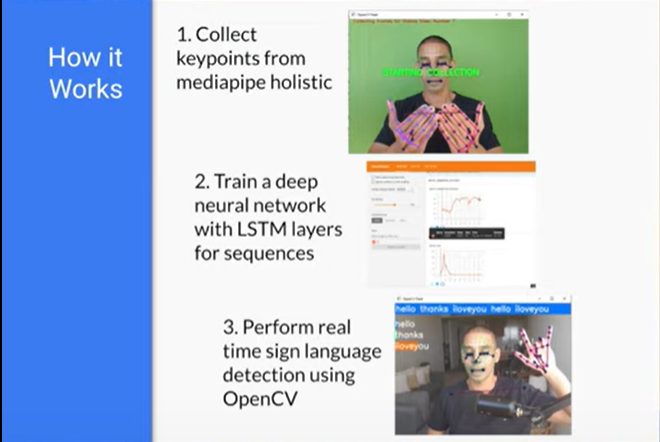

## There are 11 steps to be completed
1. Import and Dependencies
2. Keypoints using MP hollistic
3. Extract Keypoint values
4. Setup folders
5. Collect keypoint values for testing and training
6. Preprocess data, create labels and features
7. Build and train LSTM NN
8. Make predictions
9. Save weights
10. Evaluation using confusion matrix and Accuracy
11. Test

### 1. Import and Dependencies

In [3]:
!pip install tensorflow==2.8.1 tensorflow-gpu==2.8.1 opencv-python mediapipe 

     ---------------------------------------- 0.0/438.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/438.3 MB ? eta -:--:--
     -------------------------------------- 0.0/438.3 MB 330.3 kB/s eta 0:22:07
     -------------------------------------- 0.0/438.3 MB 330.3 kB/s eta 0:22:07
     -------------------------------------- 0.0/438.3 MB 330.3 kB/s eta 0:22:07
     -------------------------------------- 0.0/438.3 MB 330.3 kB/s eta 0:22:07
     -------------------------------------- 0.1/438.3 MB 327.7 kB/s eta 0:22:18
     -------------------------------------- 0.1/438.3 MB 344.8 kB/s eta 0:21:11
     -------------------------------------- 0.1/438.3 MB 343.4 kB/s eta 0:21:16
     -------------------------------------- 0.2/438.3 MB 382.3 kB/s eta 0:19:07
     -------------------------------------- 0.2/438.3 MB 374.9 kB/s eta 0:19:29
     -------------------------------------- 0.2/438.3 MB 374.9 kB/s eta 0:19:29
     -------------------------------------- 0.2/438.3 

In [3]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp

### 2. Keypoints using MP hollistic

In [4]:
# This imports the Holistic solution from the MediaPipe library and assigns it to the variable mph. The Holistic solution 
#is a machine learning model that performs real-time multi-person pose estimation, face detection, and hand tracking.
mph = mp.solutions.holistic

# This imports the drawing utilities module from the MediaPipe library and assigns it to the variable mpd. 
#The drawing utilities module provides functions that can be used to visualize the output of the Holistic solution, 
#such as drawing the detected keypoints on an image or video frame.
mpd = mp.solutions.drawing_utils

In [5]:
def detect_mp(image, model):
    
    # This converts the input image from BGR (the default OpenCV color space) to RGB,
    #which is the color space used by the MediaPipe library.
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    #This sets the image's writeable flag to False, which makes it read-only and allows
    #for better memory efficiency when passing the image to the MediaPipe model.
    image.flags.writeable = False
    
    #This passes the processed image to the MediaPipe model for detection and returns 
    #the detection results in the results object
    results = model.process(image)
    
    # again writeable
    image.flags.writeable = True
    
    #This converts the image back to the BGR color space for compatibility
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    return image,results

In [6]:
def render_landmarks(image, results):
    mpd.draw_landmarks(image,results.face_landmarks, mph.FACEMESH_CONTOURS)
    mpd.draw_landmarks(image,results.pose_landmarks, mph.POSE_CONNECTIONS)    
    mpd.draw_landmarks(image,results.left_hand_landmarks, mph.HAND_CONNECTIONS)    
    mpd.draw_landmarks(image,results.right_hand_landmarks, mph.HAND_CONNECTIONS)    

In [7]:
def render_landmarks_with_specs(image,results):
    
    mpd.draw_landmarks(image,results.face_landmarks, mph.FACEMESH_CONTOURS, mpd.DrawingSpec(color=(80,110,10), thickness=1,circle_radius=1),mpd.DrawingSpec(color=(80,256,121), thickness=1,circle_radius=1))
    
    mpd.draw_landmarks(image,results.pose_landmarks, mph.POSE_CONNECTIONS,mpd.DrawingSpec(color=(80,22,10), thickness=2,circle_radius=4),mpd.DrawingSpec(color=(80,44,121), thickness=2,circle_radius=2))  
    
    mpd.draw_landmarks(image,results.left_hand_landmarks, mph.HAND_CONNECTIONS,mpd.DrawingSpec(color=(121,22,76), thickness=2,circle_radius=4),mpd.DrawingSpec(color=(121,44,250), thickness=2,circle_radius=2))
    
    mpd.draw_landmarks(image,results.right_hand_landmarks, mph.HAND_CONNECTIONS,mpd.DrawingSpec(color=(245,117,66), thickness=2,circle_radius=4),mpd.DrawingSpec(color=(245,66,230), thickness=2,circle_radius=2))

In [81]:
mph.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

This code captures video from the default camera (usually the webcam) using OpenCV's VideoCapture() function and displays the captured video in a window named 'openCV Feed'. The code continues to run and display the video feed until the user presses the 'q' key, at which point the program stops and the window is closed. Here is a step-by-step explanation of the code:

In [263]:
#This creates a VideoCapture object cap that reads video from the default camera (0), using the OpenCV library.
cap = cv2.VideoCapture(0)


# creates a new instance of the Holistic class from the MediaPipe library with minimum detection and tracking confidence levels 
# set to 0.5, and assigns it to the variable holistic. The with statement ensures that the Holistic instance is properly 
# initialized and cleaned up when the statement is exited, and provides a convenient way to use the Holistic model in a Python
# script for real-time detection and tracking of pose, face, and hands in input images or video frames.

with mph.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5, static_image_mode=False) as holistic: 


    #This initiates a while loop that runs as long as the video capture is open.
    while cap.isOpened():
        #This captures the video frame-by-frame and returns two values: 
        #ret (a boolean value indicating whether the frame was successfully read) and frame (the actual video frame as a numpy array).
        ret, frame = cap.read()


        # make detections
        image,results = detect_mp(frame, holistic)
        
        
        #draw landmarks
        render_landmarks_with_specs(image,results)

    
        #This displays the current video frame in a window named 'openCV Feed' using OpenCV's imshow() function.
        cv2.namedWindow('openCV Feed', cv2.WND_PROP_FULLSCREEN)
        cv2.imshow('openCV Feed', image)

        #This waits for a key event for 10 milliseconds and checks whether the pressed key is 'q'. 
        #If the key is 'q', it breaks out of the loop.
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    #This releases the video capture object, freeing up system resources.
    cap.release()

    #This closes all the OpenCV windows that were opened during the program's execution.
    cv2.destroyAllWindows()

In [275]:
len(results.face_landmarks.landmark)

468

In [265]:
len(results.pose_landmarks.landmark)

33

In [266]:
len(results.left_hand_landmarks.landmark)

21

In [267]:
frame

array([[[158, 166, 159],
        [157, 163, 155],
        [164, 166, 159],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[159, 167, 162],
        [160, 165, 159],
        [166, 168, 161],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[163, 164, 159],
        [166, 166, 162],
        [166, 165, 161],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[122, 132, 138],
        [122, 132, 139],
        [121, 131, 139],
        ...,
        [ 35,  36,  71],
        [ 39,  38,  72],
        [ 37,  36,  70]],

       [[121, 131, 139],
        [122, 132, 140],
        [121, 131, 139],
        ...,
        [ 31,  33,  66],
        [ 32,  32,  62],
        [ 35,  35,  64]],

       [[120, 129, 138],
        [120, 129, 137],
        [121, 131, 139],
        ...,
        [ 29,  33,  65],
        [ 27,  31,  61],
        [ 29,  34,  63]]

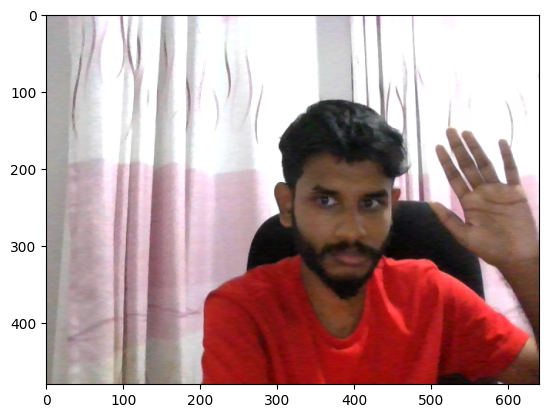

In [268]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [269]:
render_landmarks(frame,results)

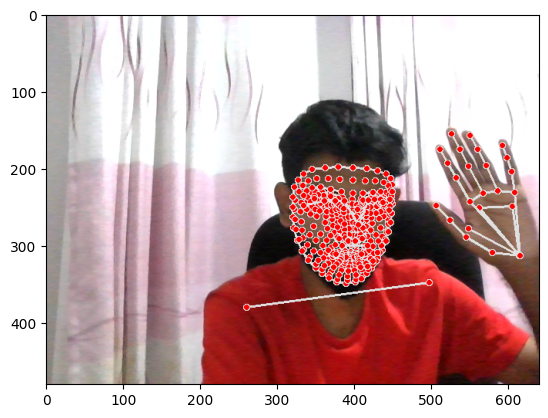

In [270]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

### 3. Extract Keypoint values

In [7]:
pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)

NameError: name 'results' is not defined

In [162]:
face = np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [163]:
left_hand = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

In [164]:
right_hand = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [8]:
def extract_keypoints(results):
    pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    left_hand = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    right_hand = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    
    return np.concatenate([pose,face,left_hand,right_hand])
    

In [171]:
extracted = extract_keypoints(results)

In [177]:
extracted.shape

(1662,)

In [176]:
np.save('0',extracted)

In [178]:
np.load('0.npy')

array([ 0.56933796,  0.52331883, -0.57919264, ...,  0.        ,
        0.        ,  0.        ])

### 4. Setup folders

In [11]:
DATA_PATH = os.path.join('MP_DATA')
actions = np.array(['hello','thanks','iloveyou'])
actions2 = np.array(['see you later','I_am_sorry','you_are_welcome'])

no_seq = 50 # thirty videos
seq_length = 50 # # use 30 different frames to detect actions rather than using a single frame

In [213]:
for action in actions:
    for sequence in range(no_seq):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [86]:
for action in actions2:
    for sequence in range(no_seq):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

### 5. Collect keypoint values for testing and training

In [214]:
cap = cv2.VideoCapture(0)



with mph.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic: 

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    # loop through actions
    for action in actions:
        for seq in range(no_seq):
            # loop through video length 
            for frame_no in range(seq_length):
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                
                # read feed
                ret, frame = cap.read()

                # make detections
                image,results = detect_mp(frame, holistic)
                
                
                
                # draw landmarks
                render_landmarks_with_specs(image,results)
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                # wait logic
                if frame_no == 0:
                    cv2.putText(image, 'Starting Collection...' , (120,120), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} video number {}'.format(action,seq), (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                    
                else:
                    cv2.putText(image, 'Collecting frames for {} video number {}'.format(action,seq), (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                # new export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(seq), str(frame_no))
                np.save(npy_path, keypoints)
    
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    
                cv2.namedWindow('openCV Feed', cv2.WND_PROP_FULLSCREEN)
                cv2.imshow('openCV Feed', image)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()

    cv2.destroyAllWindows()

In [182]:
cap = cv2.VideoCapture(0)



with mph.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5, static_image_mode=False) as holistic: 

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    # loop through actions
    for action in actions2:
        for seq in range(no_seq):
            # loop through video length 
            for frame_no in range(seq_length):
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                
                # read feed
                ret, frame = cap.read()

                # make detections
                image,results = detect_mp(frame, holistic)
                
                
                
                # draw landmarks
                render_landmarks_with_specs(image,results)
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                # wait logic
                if frame_no == 0:
                    cv2.putText(image, 'Starting Collection...' , (120,120), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 1, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} video number {}'.format(action,seq), (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                    
                else:
                    cv2.putText(image, 'Collecting frames for {} video number {}'.format(action,seq), (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                # new export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(seq), str(frame_no))
                np.save(npy_path, keypoints)
    
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    
                cv2.namedWindow('openCV Feed', cv2.WND_PROP_FULLSCREEN)
                cv2.imshow('openCV Feed', image)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()

    cv2.destroyAllWindows()

### 6. Preprocess data, create labels and features

In [56]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [10]:
new_act = np.concatenate((actions, actions2), axis=None)

In [57]:
 label_map = {label: num for num,label in enumerate(actions)}

In [58]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [59]:
sequences, labels = [],[]

for action in actions:
    for seq in range(no_seq):
        window = []
        for frame_no in range(seq_length):
            res = np.load(os.path.join(DATA_PATH, action, str(seq), "{}.npy".format(frame_no)))
            window.append(res)
            
            
        sequences.append(window)
        labels.append(label_map[action])

In [196]:
# sequences = features
# labels = y

In [60]:
x = np.array(sequences)

In [61]:
y = np.array(labels)

In [221]:
x.shape

(150, 50, 1662)

In [224]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [62]:
y = to_categorical(labels).astype(int)

In [63]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)

In [64]:
X_train.shape

(120, 50, 1662)

In [65]:
X_test.shape

(30, 50, 1662)

In [66]:
y_train.shape

(120, 3)

In [67]:
y_test.shape

(30, 3)

### 7. Build and train LSTM NN

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

In [69]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [70]:
optimizer = Adam(learning_rate=0.001)

model = Sequential()
model.add(LSTM(128, return_sequences=True, activation='relu',input_shape=(50,1662)))
model.add(BatchNormalization()) # Add Batch Normalization
model.add(LSTM(256, return_sequences=True, activation='relu'))
model.add(BatchNormalization())
model.add(LSTM(128, return_sequences=False, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(actions.shape[0], activation='softmax'))

This is a code snippet written in Python using Keras API for building a deep learning model. The model is an instance of the Sequential class, which allows building a sequential model by adding layers to it one-by-one.

The model consists of multiple layers of Long Short-Term Memory (LSTM) units, which are a type of recurrent neural network (RNN) designed to handle time series data. The LSTM layers are used to capture the sequential dependencies in the input data.

Here is a brief explanation of each layer:

The first layer is an LSTM layer with 64 units, return_sequences=True specifies that the output of this layer will be fed as input to the next LSTM layer, and input_shape=(30,1662) specifies the shape of the input data.

The second layer is an LSTM layer with 128 units, return_sequences=True specifies that the output of this layer will be fed as input to the next LSTM layer, and activation='relu' specifies the rectified linear unit activation function.

The third layer is an LSTM layer with 64 units, return_sequences=False specifies that the output of this layer will not be fed as input to any subsequent LSTM layer.

The fourth layer is a dense layer with 64 units and activation='relu', which applies the rectified linear unit activation function to the output of the previous layer.

The fifth layer is another dense layer with 64 units and activation='relu', which applies the rectified linear unit activation function to the output of the previous layer.

The final layer is a dense layer with the number of units equal to the number of classes in the output, and activation='softmax', which applies the softmax activation function to the output of the previous layer. The softmax function produces a probability distribution over the classes, making the output suitable for multi-class classification problems.

In [142]:
x.shape

(90, 30, 1662)

In [234]:
res = [0.7,0.2,0.1]

In [235]:
actions[np.argmax(res)]

'hello'

In [71]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [73]:
model.fit(X_train,y_train,epochs=260, callbacks=[tb_callback])

Epoch 1/260
4/4 [==============================] - 2s 353ms/step - loss: 0.0032 - categorical_accuracy: 1.0000
Epoch 2/260
4/4 [==============================] - 1s 266ms/step - loss: 0.0047 - categorical_accuracy: 1.0000
Epoch 3/260
4/4 [==============================] - 1s 261ms/step - loss: 0.0023 - categorical_accuracy: 1.0000
Epoch 4/260
4/4 [==============================] - 1s 270ms/step - loss: 0.0493 - categorical_accuracy: 0.9833
Epoch 5/260
4/4 [==============================] - 1s 260ms/step - loss: 0.0028 - categorical_accuracy: 1.0000
Epoch 6/260
4/4 [==============================] - 1s 268ms/step - loss: 0.0386 - categorical_accuracy: 0.9833
Epoch 7/260
4/4 [==============================] - 1s 255ms/step - loss: 0.0270 - categorical_accuracy: 0.9833
Epoch 8/260
4/4 [==============================] - 1s 255ms/step - loss: 0.0354 - categorical_accuracy: 0.9917
Epoch 9/260
4/4 [==============================] - 1s 243ms/step - loss: 0.0209 - categorical_accuracy: 0.9917
E

4/4 [==============================] - 1s 251ms/step - loss: 0.2282 - categorical_accuracy: 0.9417
Epoch 75/260
4/4 [==============================] - 1s 252ms/step - loss: 0.2236 - categorical_accuracy: 0.9083
Epoch 76/260
4/4 [==============================] - 1s 245ms/step - loss: 0.2993 - categorical_accuracy: 0.8833
Epoch 77/260
4/4 [==============================] - 1s 249ms/step - loss: 0.2068 - categorical_accuracy: 0.9250
Epoch 78/260
4/4 [==============================] - 1s 265ms/step - loss: 0.2444 - categorical_accuracy: 0.9000
Epoch 79/260
4/4 [==============================] - 1s 257ms/step - loss: 0.1324 - categorical_accuracy: 0.9583
Epoch 80/260
4/4 [==============================] - 1s 252ms/step - loss: 0.1206 - categorical_accuracy: 0.9500
Epoch 81/260
4/4 [==============================] - 1s 258ms/step - loss: 0.1053 - categorical_accuracy: 0.9750
Epoch 82/260
4/4 [==============================] - 1s 266ms/step - loss: 0.1079 - categorical_accuracy: 0.9583
Epoch

4/4 [==============================] - 1s 252ms/step - loss: 0.0914 - categorical_accuracy: 0.9750
Epoch 147/260
4/4 [==============================] - 1s 270ms/step - loss: 0.0562 - categorical_accuracy: 0.9917
Epoch 148/260
4/4 [==============================] - 1s 245ms/step - loss: 0.6432 - categorical_accuracy: 0.7750
Epoch 149/260
4/4 [==============================] - 1s 253ms/step - loss: 0.4643 - categorical_accuracy: 0.8333
Epoch 150/260
4/4 [==============================] - 1s 258ms/step - loss: 2.2046 - categorical_accuracy: 0.5250
Epoch 151/260
4/4 [==============================] - 1s 250ms/step - loss: 1.9343 - categorical_accuracy: 0.4667
Epoch 152/260
4/4 [==============================] - 1s 260ms/step - loss: 1.7590 - categorical_accuracy: 0.3417
Epoch 153/260
4/4 [==============================] - 1s 263ms/step - loss: 1.3518 - categorical_accuracy: 0.3583
Epoch 154/260
4/4 [==============================] - 1s 249ms/step - loss: 0.9696 - categorical_accuracy: 0.57

4/4 [==============================] - 1s 250ms/step - loss: 0.1218 - categorical_accuracy: 0.9500
Epoch 219/260
4/4 [==============================] - 1s 266ms/step - loss: 0.1392 - categorical_accuracy: 0.9500
Epoch 220/260
4/4 [==============================] - 1s 278ms/step - loss: 0.0758 - categorical_accuracy: 0.9750
Epoch 221/260
4/4 [==============================] - 1s 270ms/step - loss: 0.0856 - categorical_accuracy: 0.9833
Epoch 222/260
4/4 [==============================] - 1s 265ms/step - loss: 0.1068 - categorical_accuracy: 0.9750
Epoch 223/260
4/4 [==============================] - 1s 258ms/step - loss: 0.1863 - categorical_accuracy: 0.9417
Epoch 224/260
4/4 [==============================] - 1s 260ms/step - loss: 0.0930 - categorical_accuracy: 0.9667
Epoch 225/260
4/4 [==============================] - 1s 281ms/step - loss: 0.1194 - categorical_accuracy: 0.9583
Epoch 226/260
4/4 [==============================] - 1s 275ms/step - loss: 0.1028 - categorical_accuracy: 0.96

In [74]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50, 128)           916992    
                                                                 
 batch_normalization_6 (Batc  (None, 50, 128)          512       
 hNormalization)                                                 
                                                                 
 lstm_4 (LSTM)               (None, 50, 256)           394240    
                                                                 
 batch_normalization_7 (Batc  (None, 50, 256)          1024      
 hNormalization)                                                 
                                                                 
 lstm_5 (LSTM)               (None, 128)               197120    
                                                                 
 batch_normalization_8 (Batc  (None, 128)             

### 8. Make predictions

In [76]:
res = model.predict(X_test)

In [77]:
actions[np.argmax(res[2])]

'thanks'

In [78]:
actions[np.argmax(y_test[2])]

'iloveyou'

### 9. Save weights

In [41]:
model.save('actions4_19.h5')

In [198]:
del model

In [ ]:
model.load_weights('action.h5')

In [79]:
y_train

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1,

In [80]:
from  sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [81]:
y_ = model.predict(X_train)

In [82]:
y_true = np.argmax(y_train, axis=1).tolist()
y_ = np.argmax(y_, axis=1).tolist()

In [83]:
multilabel_confusion_matrix(y_true,y_)

array([[[81,  0],
        [39,  0]],

       [[ 0, 81],
        [ 0, 39]],

       [[78,  0],
        [42,  0]]], dtype=int64)

In [84]:
accuracy_score(y_true,y_)

0.325

In [281]:
y_train

array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1,

In [48]:
# new detection variables
seq = []
sentence = []
threshold = 0.4
now_ac = ""

#This creates a VideoCapture object cap that reads video from the default camera (0), using the OpenCV library.
cap = cv2.VideoCapture(0)


# creates a new instance of the Holistic class from the MediaPipe library with minimum detection and tracking confidence levels 
# set to 0.5, and assigns it to the variable holistic. The with statement ensures that the Holistic instance is properly 
# initialized and cleaned up when the statement is exited, and provides a convenient way to use the Holistic model in a Python
# script for real-time detection and tracking of pose, face, and hands in input images or video frames.

with mph.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic: 


    #This initiates a while loop that runs as long as the video capture is open.
    while cap.isOpened():
        #This captures the video frame-by-frame and returns two values: 
        #ret (a boolean value indicating whether the frame was successfully read) and frame (the actual video frame as a numpy array).
        ret, frame = cap.read()


        # make detections
        image,results = detect_mp(frame, holistic)
        
        
        #draw landmarks
        render_landmarks_with_specs(image,results)
        
        
        # logic
        
        keypoints = extract_keypoints(results)
        seq.append(keypoints)
        seq = seq[-50:]
        
        if len(seq) == 50:
            res = model.predict(np.expand_dims(seq, axis=0))[0]
            now_action = actions[np.argmax(res)]
            print(now_action)
#             if now_action != now_ac:
#                 print(now_action)
#                 now_ac = now_action

    
        #This displays the current video frame in a window named 'openCV Feed' using OpenCV's imshow() function.
        cv2.namedWindow('openCV Feed', cv2.WND_PROP_FULLSCREEN)
        cv2.imshow('openCV Feed', image)

        #This waits for a key event for 10 milliseconds and checks whether the pressed key is 'q'. 
        #If the key is 'q', it breaks out of the loop.
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    #This releases the video capture object, freeing up system resources.
    cap.release()

    #This closes all the OpenCV windows that were opened during the program's execution.
    cv2.destroyAllWindows()

iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
hello
hello
hello
hello
hello
thanks
thanks
hello
thanks
thanks
thanks
thanks
thanks
thanks
thanks
hello
thanks
thanks

iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou


In [72]:
X_test[0].shape

(30, 1662)